In [17]:
import tensorflow as tf
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
%matplotlib inline

In [2]:
def read_data():
    mypath = './data/data1/'
    data_lidar = sorted(glob.glob(mypath + '*txt'), key=os.path.basename)
    data_leftcamera = sorted(glob.glob(mypath + 'left*'), key=os.path.basename)
    data_leftcamera = data_leftcamera[:len(data_lidar)]
    data_rightcamera = sorted(glob.glob(mypath + 'right*'), key=os.path.basename)
    data_rightcamera = data_rightcamera[:752]
    print "len lidar: ", len(data_lidar)
    print "len left: ", len(data_leftcamera)
    print "len right: ", len(data_rightcamera)
    return [data_lidar, data_leftcamera, data_rightcamera]


In [4]:
data_lidar, data_leftcamera, data_rightcamera = read_data()


len lidar:  752
len left:  752
len right:  752


In [5]:
leftcamera_filename_queue = tf.train.string_input_producer(data_leftcamera)
rightcamera_filename_queue = tf.train.string_input_producer(data_rightcamera)
lidar_filename_queue = tf.train.string_input_producer(data_lidar)

In [6]:
leftcamera_reader = tf.WholeFileReader()
leftcamera_file_name, leftcamera_file = leftcamera_reader.read(leftcamera_filename_queue)
left_image = tf.image.decode_png(leftcamera_file)

(125, 672, 3)


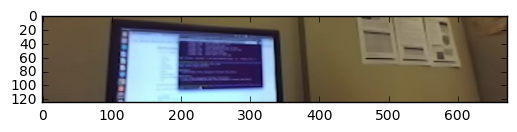

In [18]:
# Start a new session to show example output.
with tf.Session() as sess:
    # Required to get the filename matching to run.
    tf.initialize_all_variables().run()

    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    

    # Get an image tensor and print its value.
    image_tensor = sess.run(left_image) # read single image
    print image_tensor.shape
    plt.imshow(image_tensor)
    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)